# COMPRENSIÓN EDA 

### Clasificación de variables:

-AccountWeeks: Numero de semanas de semanas que el cliente lleva con la compañía, Numérica cuantitativa continua.

-ContractRenewal: Indica si el cliente renovó su contrato (1=Si, 0=No), Categórica cualitativa dicotómica.

-DataPlan: Si el cliente tiene plan de datos (1=Si, 0=No), Categórica cualitativa dicotómica.

-DataUsage: Cantidad de datos consumidos por el cliente (GB), Numérica cuantitativa continua.

-CustServCall: Número de llamadas al servicio al cliente, Numérica cuantitativa discreta.

-DayMins: Minutos de llamadas realizadas durante el día, Numérica cuantitativa continua.

-DayCalls: Numero de llamadas realizadas durante el día, Numérica cuantitativa discreta.

-MonthlyCharge: Valor mensual cobrado al cliente en USD, Numérica cuantitativa continua.

-OverageFee: Cargo adicional por exceso de uso, Numérica cuantitativa continua.

-RoamMins: Minutos de uso en roaming, Numérica cuantitativa continua.

-Churn: Variable objetivo: indica si el cliente canceló el servicio (1=Si, 0=No), Categórica cualitativa dicotómica.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 5)

# Cargar el dataset
df = pd.read_csv("telecom_churn.csv")

print("Dimensiones:", df.shape)
display(df.head())


Dimensiones: (3333, 11)


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [2]:
df.info()

#Estadisticas generales 
display(df.describe().T)

#Valores nulos 
print("\n Valores nulos por columna: ")
print(df.isnull().sum())

#Duplicados
print("\n Duplicados: ", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19



 Valores nulos por columna: 
Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

 Duplicados:  0


Observaciones:

-No existen valores nulos ni duplicados.

-Se observa que el dataset es limpio y preparado para análisis exploratorio.

-Todas las variables están correctamente tipadas.

/tmp/ipykernel_98/3554238572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


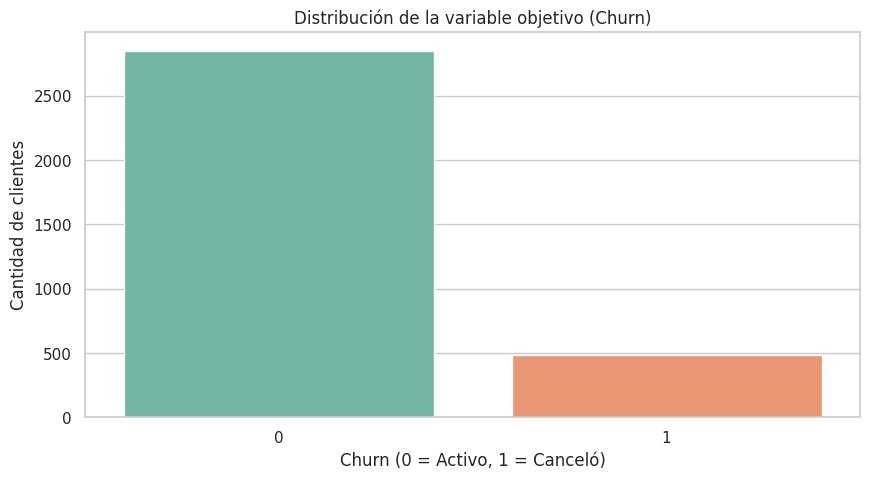

Churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

In [3]:
#Distrución de la variable objetivo 
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Distribución de la variable objetivo (Churn)")
plt.xlabel("Churn (0 = Activo, 1 = Canceló)")
plt.ylabel("Cantidad de clientes")
plt.show()

df['Churn'].value_counts(normalize=True)

Insight:

-Este diagrama muestra que el 85% de los clientes permanecen activos "Churn=0" y el 15% cancelaron "Churn=1". Esto indica que hay un desbalance de clases.

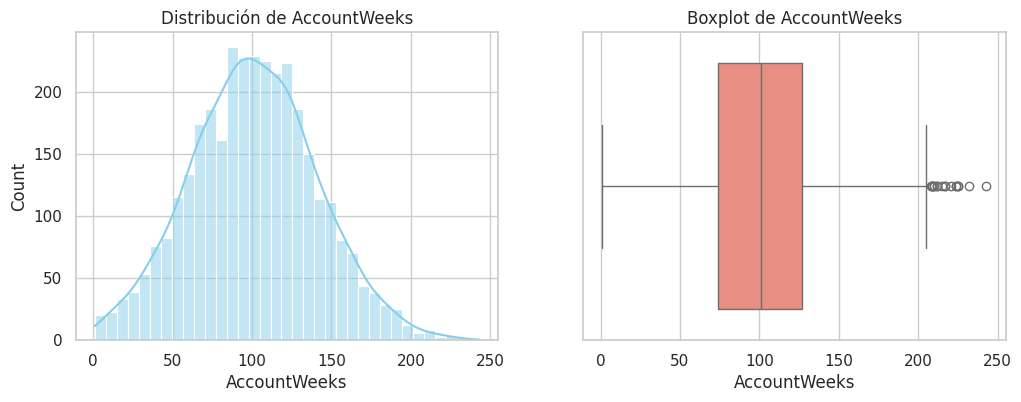

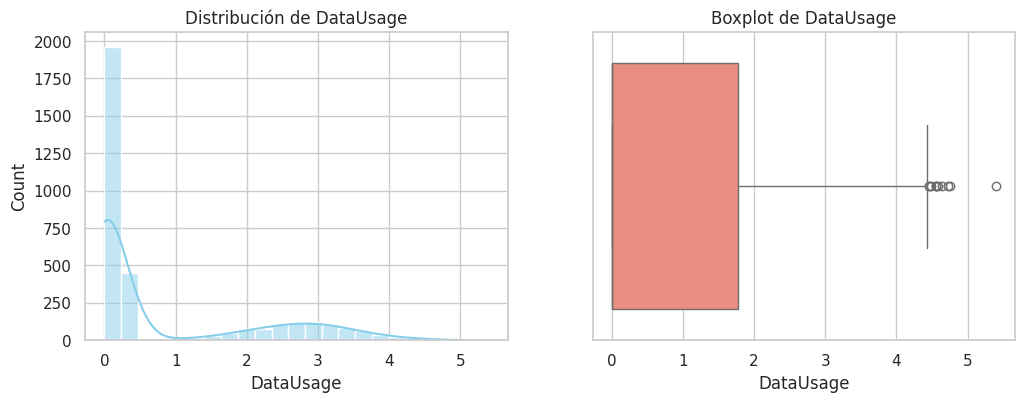

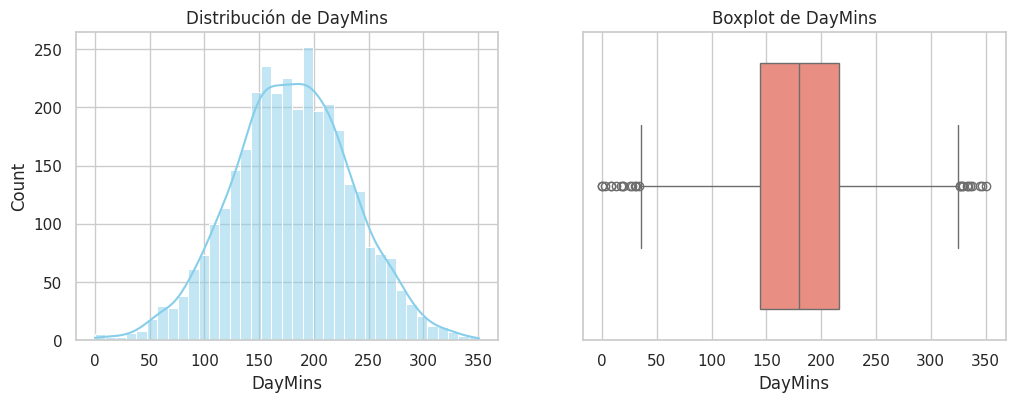

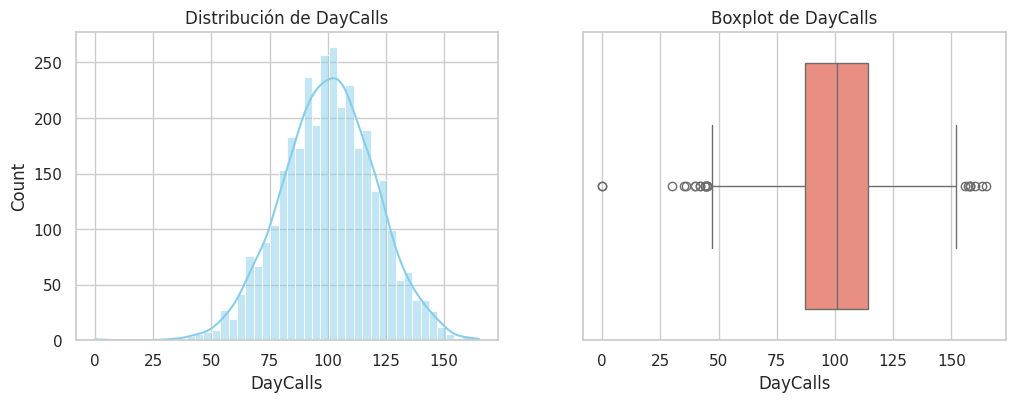

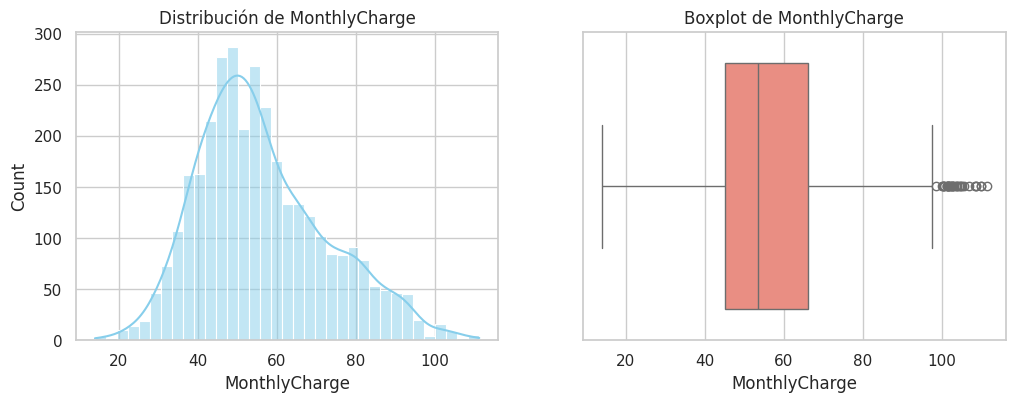

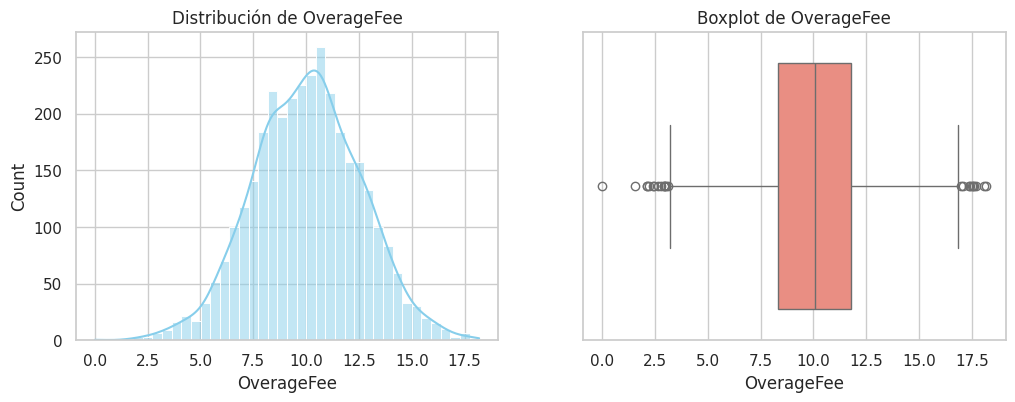

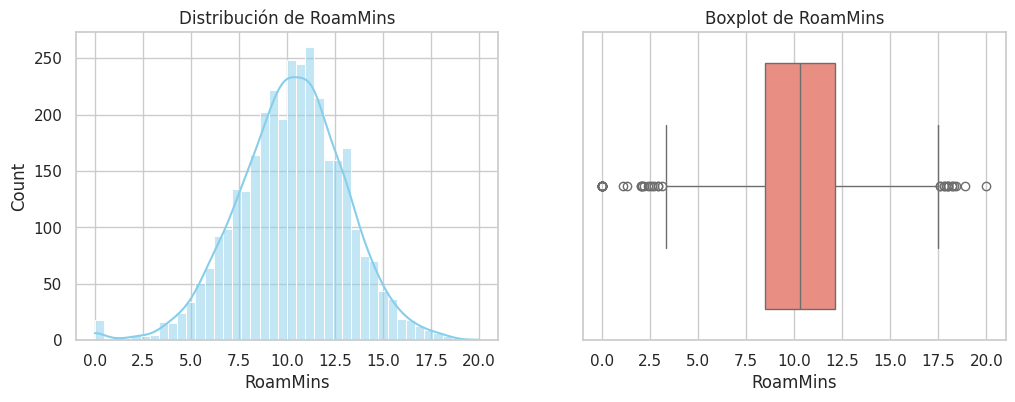

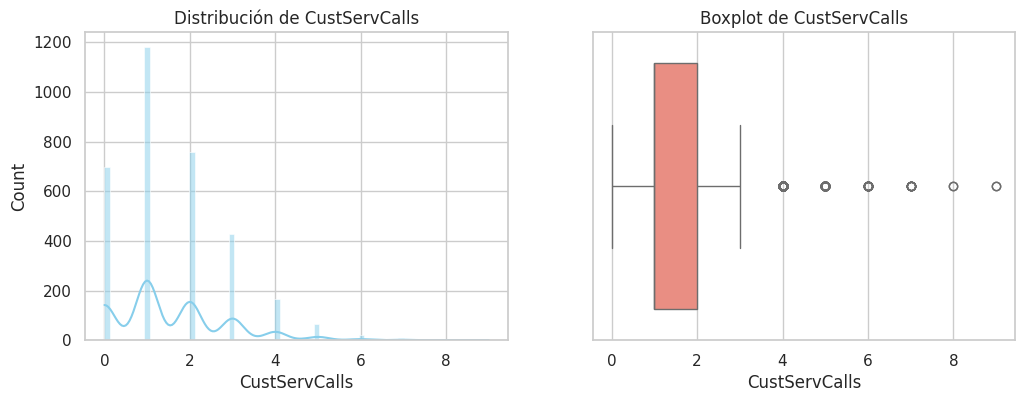

In [4]:
#Análisis univariable
num_cols = ['AccountWeeks', 'DataUsage', 'DayMins', 'DayCalls', 
'MonthlyCharge', 'OverageFee', 'RoamMins', 'CustServCalls']

for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=ax[0], color='skyblue')
    sns.boxplot(x=df[col], ax=ax[1], color='salmon')
    ax[0].set_title(f"Distribución de {col}")
    ax[1].set_title(f"Boxplot de {col}")
    plt.show()

Insight:

-Las variables como DayMins y MonthlyCharge muestran distribución casi normal.

-Las variables CustServCalls y DataUsage estan sesgadas hacia valores bajos.

-Se observa que algunos outliners en OverageFee y RoamMins, pero no son extremos.

-La mayor parte de clientes tienen bajo consumo de datos y pocas llamadas a soporte.

/tmp/ipykernel_98/3102607416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


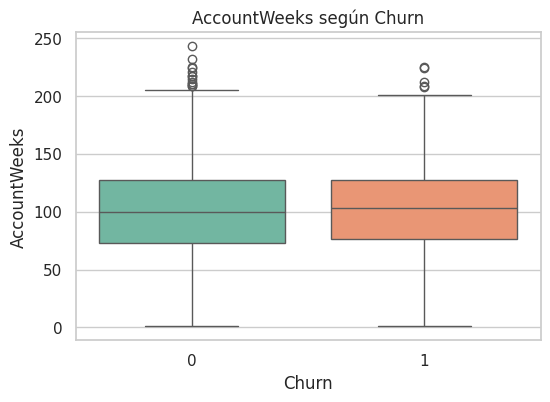

/tmp/ipykernel_98/3102607416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


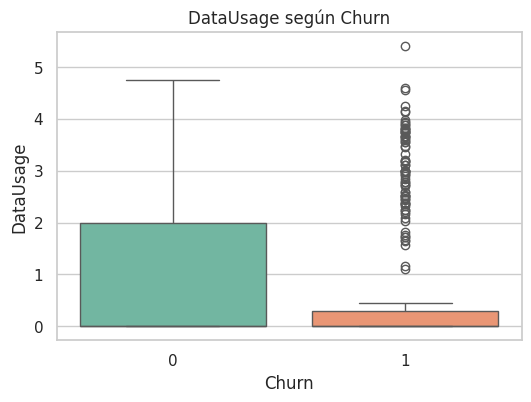

/tmp/ipykernel_98/3102607416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


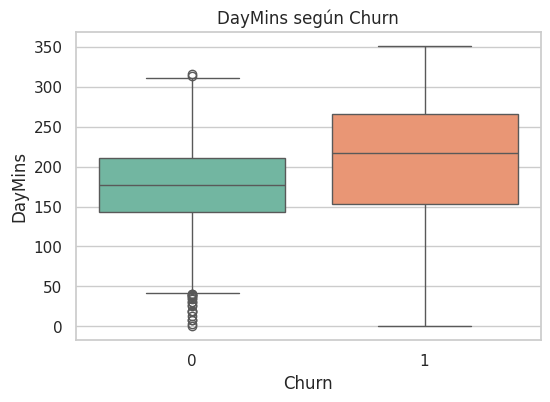

/tmp/ipykernel_98/3102607416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


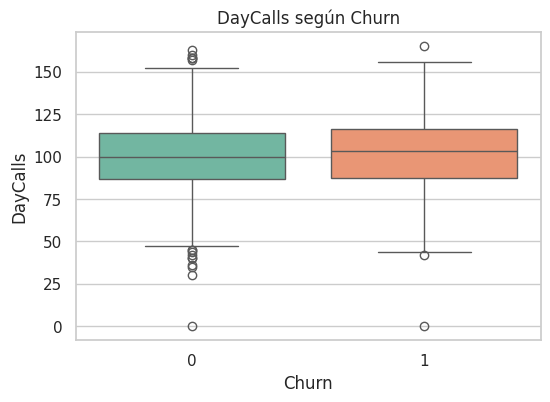

/tmp/ipykernel_98/3102607416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


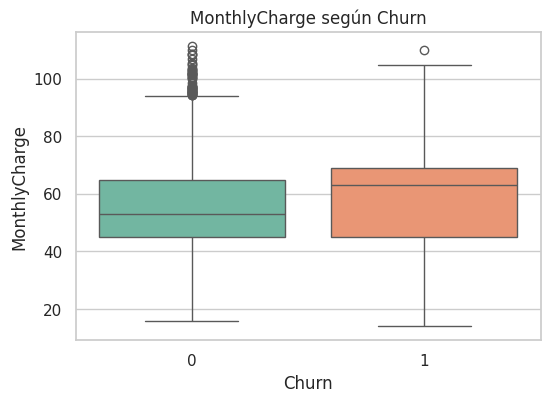

/tmp/ipykernel_98/3102607416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


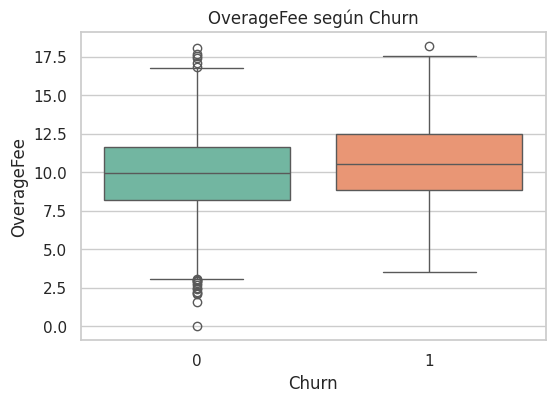

/tmp/ipykernel_98/3102607416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


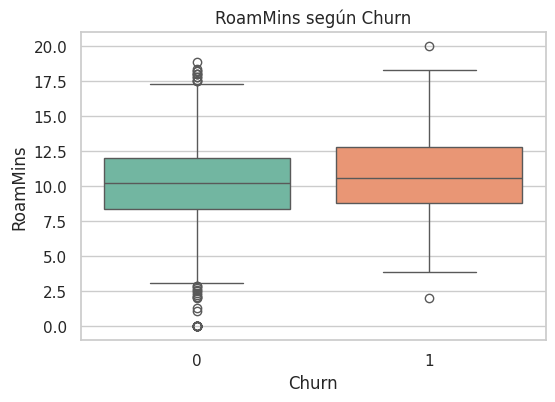

/tmp/ipykernel_98/3102607416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


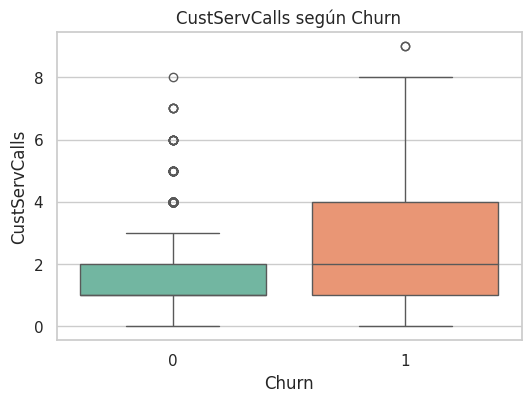

In [5]:
#Analisis bivariante
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
    plt.title(f"{col} según Churn")
    plt.show()

Insight:

-Los clientes que llaman más a servicio a cliente (CustServCalls) tienden a cancelar el servicio.

-Los clientes con mayores cargos mensuales (MonthlyCharge) suelen permanecer activos.

-Menor uso de datos (DataUsage) y menor duración de llamadas (DayMins) están relacionados con mayor churn.

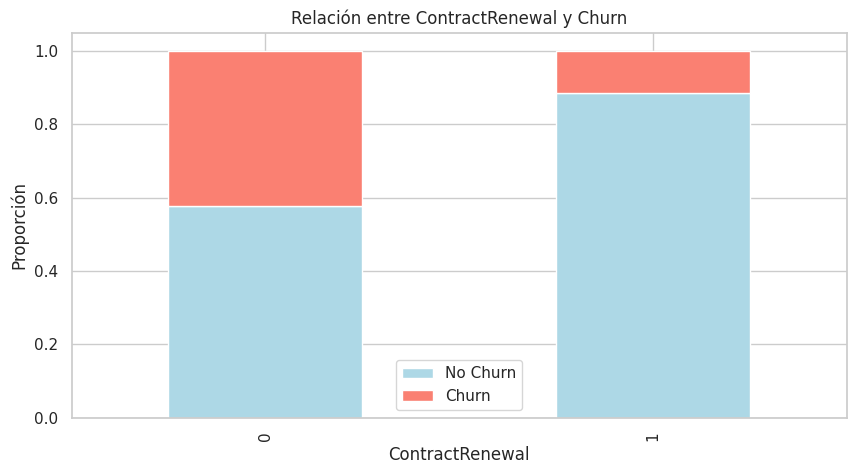

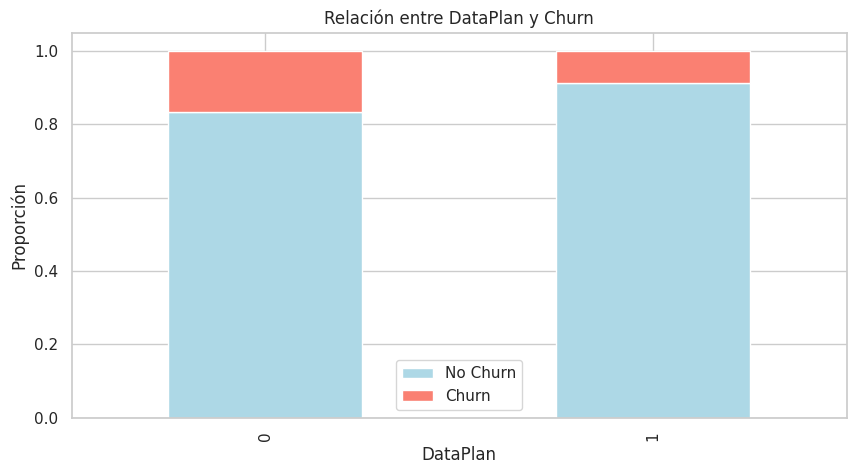

In [6]:
#Análisis categórico vs Churn
cat_cols = ['ContractRenewal', 'DataPlan']

for col in cat_cols:
    cross = pd.crosstab(df[col], df['Churn'], normalize='index')
    cross.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
    plt.title(f"Relación entre {col} y Churn")
    plt.ylabel("Proporción")
    plt.legend(["No Churn", "Churn"])
    plt.show()


Insight: 

-Los clientes que renuevan contrato (ContractRenewal = 1) presentan menor churn.

-Los clientes que no tienen plan de datos (DataPlan = 0) muestran mayor abandono. Esto da a entender que planes adicionales y fidelización contractual reducen la deserción.

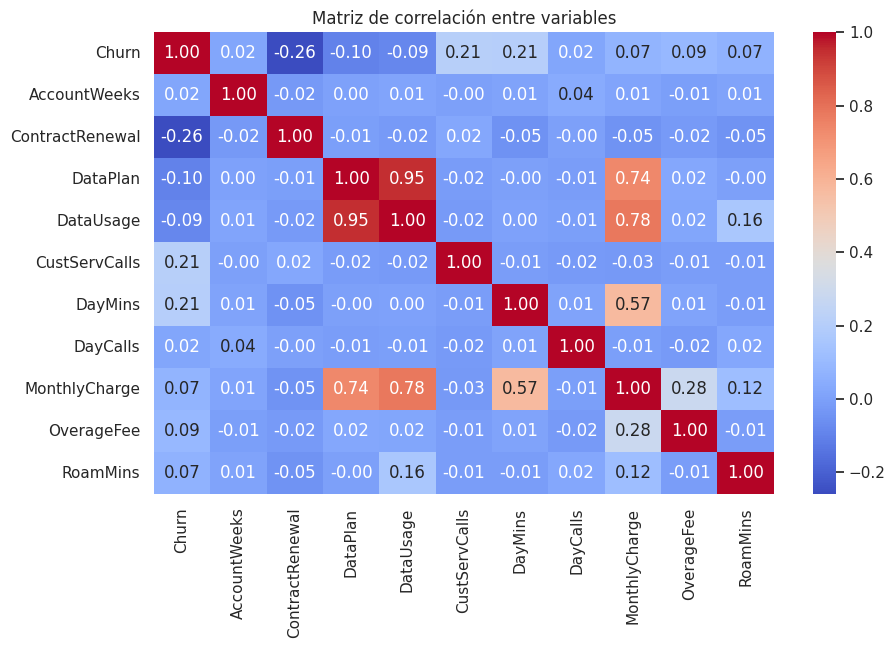

In [9]:
#Análisis multivariable
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()


Insight:

-MonthlyCharge y DayMins tienen una correlación fuerte de r=0.75.

-CustServCalls correlaciona con Churn r=0.35.

-No hay multicolinealidad significativa y esto es ideal para modelos supervisados.

# Conclusiones

1. No existen valores faltantes ni tampoco errores estructurales.

2. La variables que tienen mayor influencia sobre el churn son: 

- CustServCalls, esto significa que más llamadas a soporte es igual a más cancelaciones.

- ContractRenewal, significa que al no renovar contrato, es mas probable a que el usuario abandone.

- DataPlan, el usuario al tener plan de datos hay mas probabilidad de que haya mayor retención.

3. Hay ligeros balances de clase (Churn = 1 bajo), que deberían corregirse.

4. Las correlaciones entre variables numéricas son moderadas, sin tener redundancias.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f703592-4945-45ea-93be-011448982d02' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>